In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_4 = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv").copy()

# Function to convert string values to numeric
def convert_to_numeric(value):
    if isinstance(value, str):
        multipliers = {'k': 1e3, 'M': 1e6, 'B': 1e9}
        try:
            # Extract numeric part and suffix
            num_part = float(value[:-1])  # All but the last character
            suffix = value[-1]  # Last character
            return num_part * multipliers.get(suffix, 1)  # Multiply by corresponding multiplier
        except ValueError:
            return np.nan  # Handle invalid entries
    return value  # If not a string, return as-is

df_4.iloc[:, 1:] = df_4.iloc[:, 1:].map(convert_to_numeric) #convert to normal numbers

object_cols = df_4.iloc[:, 1:].select_dtypes(include=['object']).columns #singel out the problematic columns

df_4[object_cols] = df_4[object_cols].apply(pd.to_numeric, errors='coerce') #convert the type

df_4.iloc[:, 1:] = df_4.iloc[:, 1:].ffill(axis=1) #"forward-filling" the missing values

df_cell = df_4.sort_values(by='2015', ascending=False) 

df_cell

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
35,CHN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,859000000.0,986000000.0,1.110000e+09,1.230000e+09,1.290000e+09,1.290000e+09,1.360000e+09,1.470000e+09,1.650000e+09,1.730000e+09
87,IND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,752000000.0,894000000.0,8.650000e+08,8.860000e+08,9.440000e+08,1.000000e+09,1.130000e+09,1.170000e+09,1.180000e+09,1.150000e+09
200,USA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,285000000.0,297000000.0,3.050000e+08,3.110000e+08,3.560000e+08,3.820000e+08,3.960000e+08,4.000000e+08,4.220000e+08,4.220000e+08
86,IDN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,211000000.0,250000000.0,2.820000e+08,3.130000e+08,3.260000e+08,3.390000e+08,3.860000e+08,4.350000e+08,3.190000e+08,3.450000e+08
26,BRA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,197000000.0,234000000.0,2.480000e+08,2.710000e+08,2.810000e+08,2.580000e+08,2.440000e+08,2.180000e+08,2.070000e+08,2.070000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,MNP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20500.0,20500.0,2.050000e+04,2.050000e+04,2.050000e+04,2.050000e+04,2.050000e+04,2.050000e+04,2.050000e+04,2.050000e+04
123,MHL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66.0,66.0,6.600000e+01,6.600000e+01,1.550000e+04,1.550000e+04,1.550000e+04,1.600000e+04,1.600000e+04,1.600000e+04
144,NRU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,620.0,670.0,6.800000e+02,6.800000e+02,6.800000e+02,9.400000e+02,9.900000e+02,1.000000e+04,1.000000e+04,1.000000e+04
195,TUV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,160.0,213.0,2.800000e+02,3.400000e+02,3.800000e+02,6.600000e+02,7.600000e+02,8.000000e+02,8.000000e+02,8.000000e+02


## Joining data

We have the cleaned cell phone data from previous homework above. We will start by cleaning the population data set.



In [103]:
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/pop_data.csv")

nan_locations = df.isna()
nan_indices = nan_locations.stack()[nan_locations.stack()]

nan_indices 


110  1960    True
     1961    True
     1962    True
     1963    True
     1964    True
             ... 
196  1985    True
     1986    True
     1987    True
     1988    True
     1989    True
Length: 91, dtype: bool

We take a closer look at row 110 and 196 and take the appropriate measures.


In [104]:
print(df.loc[110], df.loc[196])

Unnamed: 0    110
iso-3         INX
1960          NaN
1961          NaN
1962          NaN
             ... 
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
Name: 110, Length: 63, dtype: object Unnamed: 0          196
iso-3               PSE
1960                NaN
1961                NaN
1962                NaN
                ...    
2016          4367088.0
2017          4454805.0
2018          4569087.0
2019          4685306.0
2020          4803269.0
Name: 196, Length: 63, dtype: object


Will delete 110 cause no data and just keep the 196 since it got good data from a specific point.

In [105]:
df_pop = df.drop(index=110)
df_pop = df.drop(columns='Unnamed: 0')
df_pop

,iso-3,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0
2,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0
3,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0
4,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
262,YEM,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,...,25475610.0,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0
263,ZAF,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,21050540.0,...,52443325.0,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0
264,ZMB,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,4029173.0,...,14265814.0,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0


Now lets combine the cell phone data and the population data.

In [106]:
df_cell_melt = pd.melt(df_cell, id_vars=["iso-3"], var_name="Year", value_name="Cell")

df_pop_melt = pd.melt(df_pop, id_vars=["iso-3"], var_name="Year", value_name="Pop")

df_merged = pd.merge(df_pop_melt, df_cell_melt, on=["iso-3", "Year"], how="inner")

df_merged[0:5]




,iso-3,Year,Pop,Cell
0,ABW,1960,54608.0,0.0
1,AFG,1960,8622466.0,0.0
2,AGO,1960,5357195.0,0.0
3,ALB,1960,1608800.0,0.0
4,AND,1960,9443.0,0.0


We will present it in a better way by converting the iso-3 names to respective country. We will also add a column with cell phones per capita.

In [107]:
df_country = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/country_data.csv")

df_merged["Cell per capita"] = df_merged["Cell"] / df_merged["Pop"] #adding column

iso_to_country = dict(zip(df_country["alpha-3"], df_country["name"])) #using mapping to replace iso w country
df_merged["iso-3"] = df_merged["iso-3"].map(iso_to_country)
df_merged.rename(columns={"iso-3": "Country"}, inplace=True)

In [108]:
df_merged["Year"] = pd.to_numeric(df_merged["Year"], errors="coerce")

#pivoting to desired format
pivot_df_merged = df_merged.pivot(index="Year", columns="Country", values="Cell per capita") 

#sorting and slicing
sorted_countries = pivot_df_merged.loc[2019].sort_values(ascending=False)

df_sorted = pivot_df_merged[sorted_countries.index]

df_sorted.loc[2015:2019, df_sorted.columns[:5]]

Country,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
Year,,,,,
2015,3.088231,2.290401,2.007424,1.956838,1.584260
2016,3.143510,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.849900
2019,3.284849,2.863650,2.127739,1.997460,1.987196


Now we plot cell per capita over the last 10 year for the countries above.

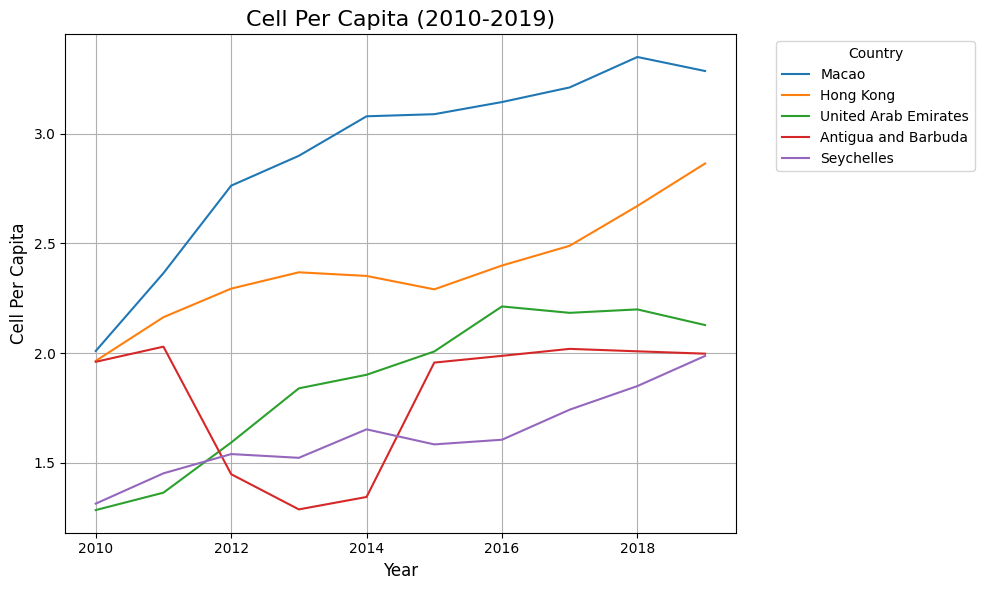

In [109]:
df_top_last10 = df_sorted.loc[2010:2019, df_sorted.columns[:5]]

df_top_last10.plot(figsize=(10,6))

# Add labels and title
plt.title("Cell Per Capita (2010-2019)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cell Per Capita", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

As instructed, I made a plot of the countries with the highest cell per capita in 2019, over the last 10 years. Looks like all of them follow the same pattern except for Antigua and Barbuda with a overall near 0 growth rate.

## SQL

First we retrieve the usernames of all users who have performed the "signup" action.

In [110]:
import sqlite3

conn = sqlite3.connect("user_actions.db")
cursor = conn.cursor()

# Query the data
query = "SELECT username FROM user_actions WHERE action = 'signup';"
pd.read_sql_query(query, conn)



,username
0,user34
1,user28
2,user1
3,user24
4,user15
5,user20
6,user18
7,user25
8,user3
9,user9


We find the total number of log entries for each user.

In [111]:

query = """
SELECT 
    user_id, 
    username, 
    COUNT(*) AS log_entry_count
FROM 
    user_actions
GROUP BY 
    user_id, username
ORDER BY 
    log_entry_count DESC;
"""
pd.read_sql_query(query, conn)

,user_id,username,log_entry_count
0,13,user13,470
1,6,user6,457
2,4,user4,436
3,35,user35,394
4,31,user31,389
5,16,user16,379
6,17,user17,367
7,7,user7,362
8,20,user20,362
9,8,user8,329


And lastly we identify users who have both logged in and signed up on the same day.

In [112]:
query = """
SELECT DISTINCT 
    u1.user_id, 
    u1.username
FROM 
    user_actions u1
JOIN 
    user_actions u2
ON 
    u1.user_id = u2.user_id 
    AND DATE(u1.timestamp) = DATE(u2.timestamp)
WHERE 
    u1.action = 'login' 
    AND u2.action = 'signup';
"""
pd.read_sql_query(query, conn)

,user_id,username
0,8,user8
1,12,user12
2,30,user30
3,7,user7
4,22,user22
5,5,user5
6,2,user2
7,32,user32


## Regex

We write a regular expression to extract all hashtags from a given comment.

In [113]:
df_c = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/comments.txt")

import re

comments = df_c['1. "Great post! #programming #tips"'].tolist()

comments = [df_c.columns[0]] + comments

pattern_h = r"#\w+"

#simple function to extract hashtags based on index in the comment list
def hashtags(nr):
    return re.findall(pattern_h, comments[nr])

hashtags(0)

['#programming', '#tips']

Lastly we create a regular expression to find comments that mention both "#programming" and "#python". We apply the regex to comment 2 and check if it matches.

In [125]:
pattern = r"(?=.*#programming)(?=.*#python)"

c = 1 #This is comment 2 due to indexing

if re.search(pattern, comments[c]):
    print(comments[c])

else:
    print("no match")

no match
